# Obtaining the Data

In [46]:
# Importing the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Reading the Car Details  csv file and store our dataset into a dataframe called "df"

df = pd.read_csv('CAR DETAILS.csv')

# Scrubbing the Data

In [48]:
# Check to see if there are any missing values in our data set

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [49]:
# Check the Type of the Dataset

df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [50]:
# Get a quick overview of what we are dealing with in our dataset

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [51]:
# Extracting brand name and car model name from name column

df['brand_name'] = df['name'].str.split().str[0]
df['car_name'] = df['name'].str.split().str[1]

In [52]:
# Removing the name column
df.drop('name', axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name,car_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [53]:
# Moving the brand_name and car_name to the froont of the table
brand = df['brand_name']
car = df['car_name']
df.drop(['brand_name', 'car_name'], axis=1, inplace = True)
df.insert(0,'brand_name', brand)
df.insert(1, 'car_name', car)
df.head()

,brand_name,car_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [54]:
# Move the reponse variable "selling_price" to the last of the table

last = df['selling_price']
df.drop('selling_price', axis=1, inplace = True)
df.insert(8,'selling_price', last)
df.head()

,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze,2014,141000,Diesel,Individual,Manual,Second Owner,450000


## Statiscal Overview

In [55]:
# Shape of the Datset

print(f'This dataset contains {df.shape[1]} columns and {df.shape[0]} observations')

This dataset contains 9 columns and 4340 observations


In [56]:
df.describe(percentiles = [0.05, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]).T

,count,mean,std,min,5%,50%,90%,95%,96%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2005.0,2014.0,2018.0,2019.0,2019.0,2019.0,2019.0,2020.0,2020.0
km_driven,4340.0,66215.777419,46644.102194,1.0,10000.0,60000.0,120000.0,140000.0,150000.0,163830.0,186000.0,220000.0,806599.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,80000.0,350000.0,900000.0,1300000.0,1479400.0,1720750.0,2492200.0,3200000.0,8900000.0


### Inference :-
- The dataset has 4340 observations and 8 columns.
- Average km driven and selling price is about 66215 and 504127 respectively.
- Oldest car is of year 1992 and the most recent is of year 2020.

## Handling Outliers

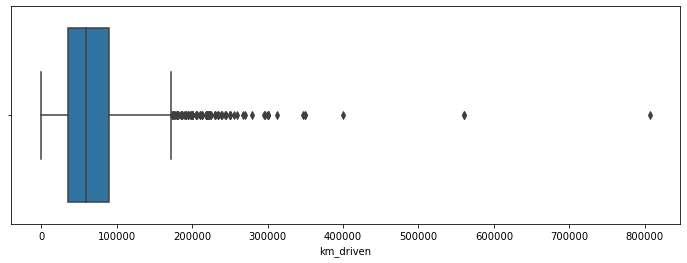

In [57]:
# Boxplot for Outliers

plt.figure(figsize=(12,4))
sns.boxplot(df['km_driven'])
plt.show()

In [58]:
df[df['km_driven']>220000].shape

(43, 9)

In [59]:
# Outlier Clipping

# As we can see 99% of the values are lessthan 220000
# Replacing outliers where the KMs Driven is greater than 220000

df['km_driven'] = np.where(df['km_driven']>220000, 220000, df['km_driven'])

# Exploring the Data

## Distribution Plots (Year - KM_Driven - Selling_Price)

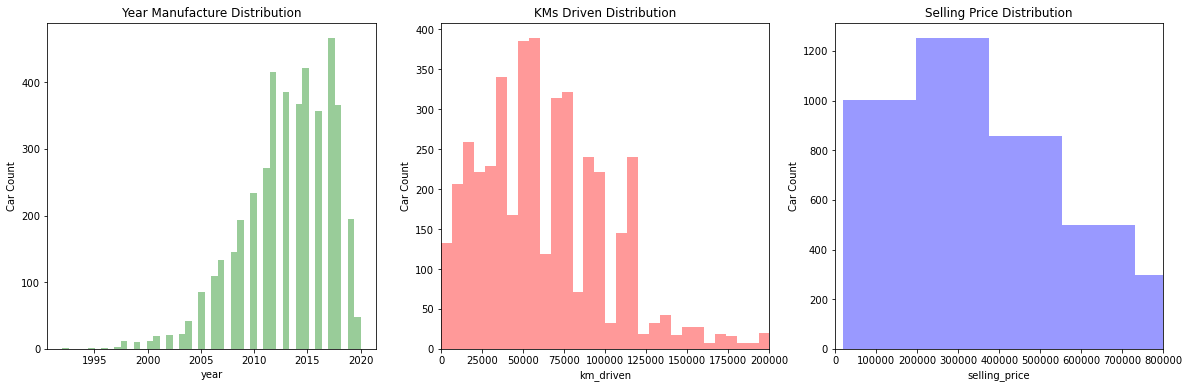

In [60]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(20, 6))

# Graph for Car Manufacturing Year
sns.distplot(df['year'], kde=False, color="g", ax=axes[0]).set_title('Year Manufacture Distribution')
axes[0].set_ylabel('Car Count')

# Graph for KMs Driven by Car
sns.distplot(df['km_driven'], kde=False, color="r", ax=axes[1]).set_title('KMs Driven Distribution')
axes[1].set_ylabel('Car Count')
axes[1].set_xlim([0,200000])

# Graph for Selling Price of the Car
sns.distplot(df['selling_price'], kde=False, color="b", ax=axes[2]).set_title('Selling Price Distribution')
axes[2].set_ylabel('Car Count')
axes[2].set_xlim([0,800000])

plt.show()

### Summary:
Let's examine the distribution on some of the car's features. Here's what I found:

- Year - There is a huge spike for cars manufactured between 2011 to 2018.
- KMs Driven - There is a unimodal distrubtion of km driven with the largest spike in between 50000 to 75000 kms.
- Selling Price - There is another unimodal distribution of selling price with the largest spike between 250000 to 400000. 
- The km driven and selling price graphs both share a similar distribution.

## Scatter Plot of Selling Price and KMs Driven

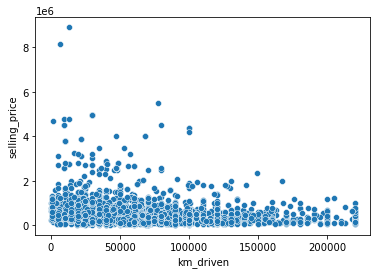

In [61]:
sns.scatterplot(x=df['km_driven'], y = df['selling_price'])
plt.show()

### Inference :- 
Selling Price and KM Driven does not have any correaltion.

## Countplot for Car Brand Name

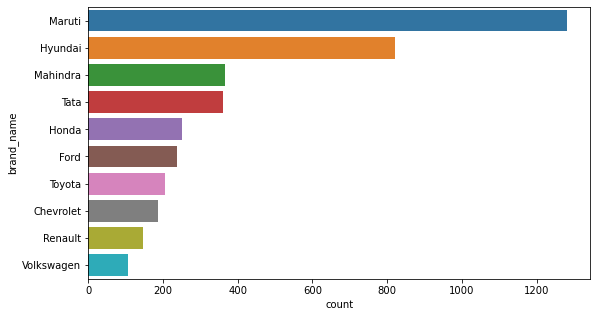

In [62]:
plt.figure(figsize=(9,5))
sns.countplot(y = df['brand_name'],order = df['brand_name'].value_counts().sort_values(ascending=False)[:10].index)
plt.show()

### Inference :-
Maruti brand have the highest numbers of cars followed by Hyundai.

## Selling Price vs Fuel

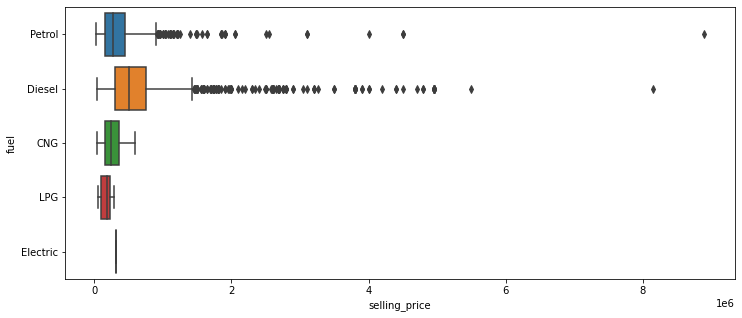

In [63]:
plt.figure(figsize=(12,5))
sns.boxplot(y='fuel', x = 'selling_price', data = df)
plt.show()

### Inference :-
- Petrol and Diesel cars are both have similar selling price with petrol cars are ahead.
- Diesel cars have high selling price compared to petrol cars.
- CNG, LPG and Electric cars are much cheaper in the old cars market.

## Selling Price vs Seller Type

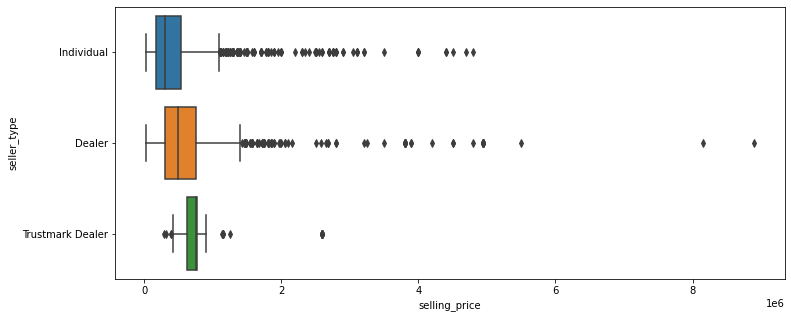

In [64]:
plt.figure(figsize=(12,5))
sns.boxplot(y='seller_type', x = 'selling_price', data = df)
plt.show()

### Infderence :-
- Trustmark dealer have significatly lowest selling price.
- Dealers average selling price is more than the Individual selling price.

## Selling Price vs Transmission

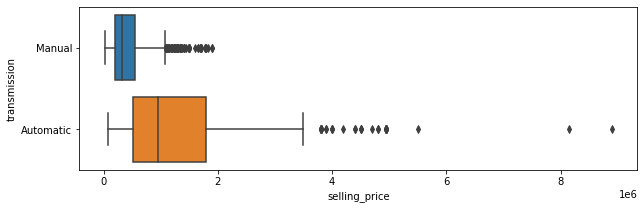

In [65]:
plt.figure(figsize=(10,3))
sns.boxplot(y='transmission', x = 'selling_price', data = df)
plt.show()

### Inference :- 
- Automatic cars are more expensive than the manual cars.

## Selling Price vs Owner

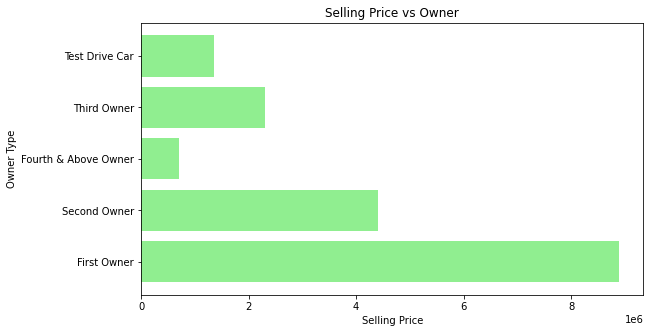

In [66]:
plt.figure(figsize=(9,5))
plt.barh(df['owner'], df['selling_price'], color = 'lightgreen')
plt.title('Selling Price vs Owner')
plt.xlabel('Selling Price')
plt.ylabel('Owner Type')
plt.show()

### Inference :-
- First owner cars have the highest selling price followed by Second owner.
- Fourth & Above owner cars significantly have the lowest selling price.
- Although Test Drive car price is even higher than the fourth & above owner.

# Modeling the Data

### Selecting the Dependent and Independent Features

In [67]:
x = df.drop('selling_price', axis=1)
y = df['selling_price']

print(type(x))
print(type(y))

print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4340, 8)
(4340,)


### Splitting the data into train and test data

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(3255, 8)
(1085, 8)
(3255,)
(1085,)


### Creating function to evaluate the Regression Evaluation Metrics

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
# Function for Regression Evaluation Metrics

d = {'Model' : [], 'MAE' : [], 'MSE' : [], 'R2Score' : []}
def eval_model(model_name, y, ypred) :
  mae = mean_absolute_error(y, ypred)
  mse = mean_squared_error(y, ypred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, ypred)
  print('MAE', mae)
  print('MSE', mse)
  print('RMSE', rmse)
  print('R2 Score', r2)
  d['Model'].append(model_name)
  d['MAE'].append(mae)
  d['MSE'].append(mse)
  d['R2Score'].append(r2)

### Importing ML Regression Libraries

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Import the neccessary sklearn transformational Libraries

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [73]:
# Let's get a quick look on the dataset
x.head(2)

,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti,800,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,50000,Petrol,Individual,Manual,First Owner


## 1) Linear Regression

In [74]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')
step2 = LinearRegression()
pipe_lr = Pipeline([('step1', step1), ('step2', step2)])
pipe_lr.fit(x_train, y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model('Linear Regression', y_test, ypred_lr)

MAE 3677394329.182741
MSE 2.454331998407281e+21
RMSE 49541215148.67475
R2 Score -7033587007.818832


## 2) Ridge

In [75]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')
step2 = Ridge(alpha=10)
pipe_ridge = Pipeline([('step1', step1), ('step2', step2)])
pipe_ridge.fit(x_train, y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model('Ridge Regression', y_test, ypred_ridge)

MAE 147724.87569821705
MSE 87541791854.06354
RMSE 295874.6218486194
R2 Score 0.7491240751809296


## 3) Lasso

In [76]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')
step2 = Lasso(alpha=0.1)
pipe_lasso = Pipeline([('step1', step1), ('step2', step2)])
pipe_lasso.fit(x_train, y_train)

ypred_lasso = pipe_lasso.predict(x_test)

eval_model('Lasso Regression', y_test, ypred_lasso)

MAE 125527.61356983858
MSE 84488875790.37875
RMSE 290669.7022229506
R2 Score 0.7578730752259448


### 4) KNeighbors Regressor

In [77]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')

# Finding the best value of K with the lowest MSE
k_values = [1, 3, 5, 7, 9]
mse_values = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    pipe_knn = Pipeline([('step1', step1), ('step2', knn)])
    pipe_knn.fit(x_train, y_train)
    y_pred = pipe_knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

best_k = k_values[np.argmin(mse_values)]
print("The best value of k is:", best_k)
print('------------------')

# Training the model and generating Predictions
step2 = KNeighborsRegressor(n_neighbors=best_k)
pipe_knn = Pipeline([('step1', step1), ('step2', step2)])
pipe_knn.fit(x_train, y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model('KNeighbors Regressor', y_test, ypred_knn)

The best value of k is: 1
------------------
MAE 181279.90414746545
MSE 177909657246.42395
RMSE 421793.382174761
R2 Score 0.4901492321479295


### 5) Decision Tree Regressor

In [78]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8, min_samples_split=15)
pipe_dt = Pipeline([('step1', step1), ('step2', step2)])
pipe_dt.fit(x_train, y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model('Decision Tree Regressor', y_test, ypred_dt)

MAE 152202.27628201945
MSE 90588054316.193
RMSE 300978.49477361835
R2 Score 0.7403941429252322


## 6) Random Forest Regressor

In [79]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [0,1,4,5,6,7])],
                         remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_split=11, random_state=5)
pipe_rf = Pipeline([('step1', step1), ('step2', step2)])
pipe_rf.fit(x_train, y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model('Random Forest Regressor', y_test, ypred_rf)

MAE 139121.43843316764
MSE 83155498698.60448
RMSE 288366.9514674046
R2 Score 0.7616942468509109


In [80]:
d

{'Model': ['Linear Regression',
  'Ridge Regression',
  'Lasso Regression',
  'KNeighbors Regressor',
  'Decision Tree Regressor',
  'Random Forest Regressor'],
 'MAE': [3677394329.182741,
  147724.87569821705,
  125527.61356983858,
  181279.90414746545,
  152202.27628201945,
  139121.43843316764],
 'MSE': [2.454331998407281e+21,
  87541791854.06354,
  84488875790.37875,
  177909657246.42395,
  90588054316.193,
  83155498698.60448],
 'R2Score': [-7033587007.818832,
  0.7491240751809296,
  0.7578730752259448,
  0.4901492321479295,
  0.7403941429252322,
  0.7616942468509109]}

In [81]:
model_performance = pd.DataFrame(d)
model_performance.T

,0,1,2,3,4,5
Model,Linear Regression,Ridge Regression,Lasso Regression,KNeighbors Regressor,Decision Tree Regressor,Random Forest Regressor
MAE,3677394329.182741,147724.875698,125527.61357,181279.904147,152202.276282,139121.438433
MSE,2454331998407280820224.0,87541791854.063538,84488875790.378754,177909657246.42395,90588054316.192993,83155498698.604477
R2Score,-7033587007.818832,0.749124,0.757873,0.490149,0.740394,0.761694


### Inference :-
Based on the R2Score the best model is Random Forest Regressor

## Save the Model

In [82]:
import pickle

In [83]:
pickle.dump(pipe_rf, open('car_predict.pkl', 'wb'))    # Saving the best performing model
pickle.dump(df, open('data.pkl', 'wb'))                # Saving the DataFrame

## Load the Model

In [84]:
loaded_model = pickle.load(open('car_predict.pkl', 'rb'))   # rb = read binary

## Making a new random dataset

In [85]:
new_df = df.sample(20)
print(new_df.shape)
new_df.head()

(20, 9)


,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
2265,Chevrolet,Beat,2016,41000,Petrol,Dealer,Manual,First Owner,239000
1478,MG,Hector,2019,14000,Diesel,Dealer,Manual,First Owner,1825000
826,Maruti,Swift,2009,60000,Petrol,Individual,Manual,Third Owner,250000
1589,Honda,Amaze,2013,94000,Diesel,Individual,Manual,Second Owner,325000
1179,Maruti,SX4,2012,120000,Diesel,Individual,Manual,First Owner,250000


In [86]:
# Selecting the Dependent Featurtes and Generating the Predictions

new_x = new_df.drop('selling_price', axis=1)
new_ytest = new_df['selling_price']
print(new_x.shape)

best_pred = loaded_model.predict(new_x)
print(eval_model('Best Model', new_ytest, best_pred))
best_pred

(20, 8)
MAE 109937.8525660944
MSE 32674316778.61512
RMSE 180760.3849813756
R2 Score 0.7713016621196792
None


array([ 365489.02087898, 1149492.62360987,  188116.49029722,
        360342.63201538,  345514.63610874,  475971.46187397,
        808254.72697223,  349865.59798529,  348834.21813685,
        188786.60402646,  875312.17770619,  291424.77234788,
        105963.07771797,  285196.04744927,  675181.3729728 ,
        349096.33895894,   97934.84244386,  127324.40137191,
        775412.23939666,  722846.58020026])

In [87]:
# Printing the Predicted Results
res = pd.DataFrame(new_x)
res['selling_price'] = best_pred.round(decimals=2)
res

,brand_name,car_name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
2265,Chevrolet,Beat,2016,41000,Petrol,Dealer,Manual,First Owner,365489.02
1478,MG,Hector,2019,14000,Diesel,Dealer,Manual,First Owner,1149492.62
826,Maruti,Swift,2009,60000,Petrol,Individual,Manual,Third Owner,188116.49
1589,Honda,Amaze,2013,94000,Diesel,Individual,Manual,Second Owner,360342.63
1179,Maruti,SX4,2012,120000,Diesel,Individual,Manual,First Owner,345514.64
4192,Renault,Duster,2014,65000,Diesel,Dealer,Manual,First Owner,475971.46
1465,Mahindra,XUV500,2015,53000,Diesel,Dealer,Manual,First Owner,808254.73
4144,Chevrolet,Sail,2013,56000,Diesel,Dealer,Manual,First Owner,349865.60
3050,Maruti,Alto,2020,1700,Petrol,Individual,Manual,First Owner,348834.22
1563,Hyundai,Santro,2010,50000,Petrol,Individual,Manual,Second Owner,188786.60
